In [188]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [189]:
state = 'NY'

# Open all models

### Predictions

In [190]:
predictions_date = {}
for model in ['sir', 'sir_100', 'regression', 'regression_100', 'bayes_sir']:
    print(model)
    predictions[model] = {pd.to_datetime(f[3:11]): pd.read_csv(os.path.join('results/', model,f), parse_dates = True, index_col = 'date')['pred_cases'] for f in  os.listdir(os.path.join('results/', model)) if state in f}
    predictions[model] = pd.DataFrame({d: predictions[model][d] for d in sorted(predictions[model])})

sir
sir_100
regression
regression_100
bayes_sir


In [191]:
ground_truth = pd.read_csv('https://covidtracking.com/api/v1/states/daily.csv', parse_dates=['date'])[['date', 'state', 'positive']]
ground_truth = ground_truth[ground_truth.state == state]
ground_truth.index = ground_truth.date
ground_truth = ground_truth.sort_index()['positive']
ground_truth

date
2020-03-04         6.0
2020-03-05        22.0
2020-03-06        33.0
2020-03-07        76.0
2020-03-08       105.0
2020-03-09       142.0
2020-03-10       173.0
2020-03-11       216.0
2020-03-12       216.0
2020-03-13       421.0
2020-03-14       524.0
2020-03-15       729.0
2020-03-16       950.0
2020-03-17      1700.0
2020-03-18      2382.0
2020-03-19      4152.0
2020-03-20      7102.0
2020-03-21     10356.0
2020-03-22     15168.0
2020-03-23     20875.0
2020-03-24     25665.0
2020-03-25     30811.0
2020-03-26     37258.0
2020-03-27     44635.0
2020-03-28     52318.0
2020-03-29     59513.0
2020-03-30     66497.0
2020-03-31     75795.0
2020-04-01     83712.0
2020-04-02     92381.0
2020-04-03    102863.0
2020-04-04    113704.0
2020-04-05    122031.0
2020-04-06    130689.0
2020-04-07    138863.0
2020-04-08    149316.0
2020-04-09    159937.0
Name: positive, dtype: float64

Columns are the date used for training, index are the date at which it is evaluated

In [192]:
predictions['sir']

,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03
date,,,,,,,
2020-03-04,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
2020-03-05,14.736568,14.682935,14.648898,14.537860,14.500563,14.438808,14.346784
2020-03-06,27.456703,27.247475,27.115180,26.686254,26.543088,26.307060,25.957687
2020-03-07,45.974361,45.426718,45.081746,43.970442,43.601943,42.997134,42.108089
2020-03-08,72.926811,71.725234,70.971265,68.558406,67.763724,66.465445,64.570675
2020-03-09,112.145293,109.759947,108.269057,103.530027,101.979991,99.459677,95.808387
2020-03-10,169.189197,164.748826,161.984422,153.257294,150.422821,145.836332,139.241355
2020-03-11,252.112106,244.208494,239.307115,223.939616,218.983522,211.003314,199.615317
2020-03-12,372.552406,358.943686,350.535980,324.354000,315.969075,302.534402,283.508532


### Remove training data

In [193]:
for model in predictions:
    for c in predictions[model].columns:
        predictions[model].loc[predictions[model].index <= c, c] = np.nan
    predictions[model] = predictions[model].dropna(how='all')

In [194]:
predictions['sir']

,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03
date,,,,,,,
2020-03-29,56836.066583,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,61613.321217,63465.675723,NaN,NaN,NaN,NaN,NaN
2020-03-31,65400.693328,68099.947155,69195.445942,NaN,NaN,NaN,NaN
2020-04-01,68295.285853,71732.603331,73312.648356,77227.653979,NaN,NaN,NaN
2020-04-02,70446.484255,74490.324852,76482.791024,82056.796035,82909.155387,NaN,NaN
2020-04-03,72012.295809,76533.543169,78859.728258,85844.647166,87227.421868,89402.167478,NaN
2020-04-04,73134.889243,78020.350290,80606.787788,88736.906687,90572.089271,93648.843895,97020.006095
2020-04-05,73931.031150,79088.177019,81872.226866,90900.465664,93104.668002,96938.043508,101756.026159
2020-04-06,74491.322994,79847.904118,82779.150528,92494.269482,94989.749830,99434.011029,105474.156090


### Compute difference

In [195]:
for model in predictions:
    for c in predictions[model].columns:
        predictions[model][c] -= ground_truth[predictions[model].index]
        predictions[model][c] = predictions[model][c].abs()

/home/vincent/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/vincent/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [206]:
predictions['sir']

,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03
date,,,,,,,
2020-03-29,2676.933417,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,4883.678783,3031.324277,NaN,NaN,NaN,NaN,NaN
2020-03-31,10394.306672,7695.052845,6599.554058,NaN,NaN,NaN,NaN
2020-04-01,15416.714147,11979.396669,10399.351644,6484.346021,NaN,NaN,NaN
2020-04-02,21934.515745,17890.675148,15898.208976,10324.203965,9471.844613,NaN,NaN
2020-04-03,30850.704191,26329.456831,24003.271742,17018.352834,15635.578132,13460.832522,NaN
2020-04-04,40569.110757,35683.649710,33097.212212,24967.093313,23131.910729,20055.156105,16683.993905
2020-04-05,48099.968850,42942.822981,40158.773134,31130.534336,28926.331998,25092.956492,20274.973841
2020-04-06,56197.677006,50841.095882,47909.849472,38194.730518,35699.250170,31254.988971,25214.843910


### Relative dataframe

Computing with regard to the start date

In [197]:
predictions_relative = {}
for model in predictions:
    predictions_relative[model] = predictions[model].copy()
    for c in predictions[model].columns:
        predictions_relative[model][c] = predictions_relative[model][c].shift(-predictions_relative[model][c].isnull().sum())
    predictions_relative[model].index = np.arange(len(predictions_relative[model]))

In [205]:
predictions_relative['sir']

,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03
0,2676.933417,3031.324277,6599.554058,6484.346021,9471.844613,13460.832522,16683.993905
1,4883.678783,7695.052845,10399.351644,10324.203965,15635.578132,20055.156105,20274.973841
2,10394.306672,11979.396669,15898.208976,17018.352834,23131.910729,25092.956492,25214.843910
3,15416.714147,17890.675148,24003.271742,24967.093313,28926.331998,31254.988971,30528.784227
4,21934.515745,26329.456831,33097.212212,31130.534336,35699.250170,37564.143339,38816.004564
5,30850.704191,35683.649710,40158.773134,38194.730518,42487.901825,46639.905119,47816.322655
6,40569.110757,42942.822981,47909.849472,45207.838755,51932.303615,56252.452632,NaN
7,48099.968850,50841.095882,55438.788847,54822.203424,61823.989119,NaN,NaN
8,56197.677006,58478.181670,65435.454294,64840.960356,NaN,NaN,NaN
9,63979.497900,68553.526121,75734.861861,NaN,NaN,NaN,NaN


# Prediction in x days

What is the error if the model tries to predict in x days ?

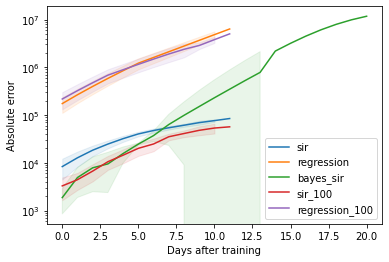

In [200]:
for model in predictions_relative:
    std = predictions_relative[model].std(axis = 1)
    mean = predictions_relative[model].mean(axis = 1)
    interval = 1.96 * std / np.sqrt(predictions_relative[model].notna().sum(axis = 1))
    
    ax = mean.plot(label = model)
    plt.fill_between(mean.index, mean + interval, mean - interval, color = ax.get_lines()[-1].get_color(), alpha=.1)
plt.xlabel("Days after training")
plt.ylabel("Absolute error")
plt.yscale('log')
plt.legend()
plt.show()

# Prediction for x days 

What is the average error for the following x days ?

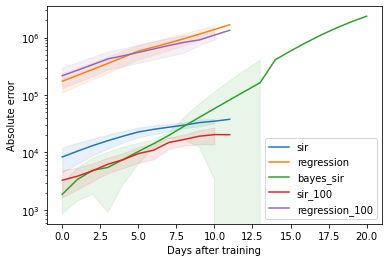

In [201]:
for model in predictions_relative:
    mean_matrix = predictions_relative[model].rolling(len(predictions_relative[model]), min_periods=1).mean()
    mean_matrix[predictions_relative[model].isnull()] = np.nan
    std = mean_matrix.std(axis = 1)
    mean = mean_matrix.mean(axis = 1)
    interval = 1.96 * std / np.sqrt(mean_matrix.notna().sum(axis = 1))
    
    ax = mean.plot(label = model)
    plt.fill_between(mean.index, mean + interval, mean - interval, color = ax.get_lines()[-1].get_color(), alpha=.1)
plt.xlabel("Days after training")
plt.ylabel("Absolute error")
plt.yscale('log')
plt.legend()
plt.show()

# Prediction for given date

What is the predictions that my model does for a given date ? Large variance indicates that the model changed 

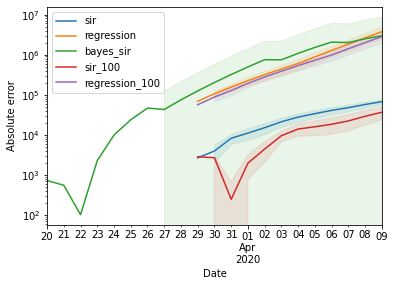

In [202]:
for model in predictions:
    std = predictions[model].std(axis = 1)
    mean = predictions[model].mean(axis = 1)
    interval = 1.96 * std / np.sqrt(predictions[model].notna().sum(axis = 1))
    
    ax = mean.plot(label = model)
    plt.fill_between(mean.index, mean + interval, mean - interval, color = ax.get_lines()[-1].get_color(), alpha=.1)
    
plt.xlabel("Date")
plt.ylabel("Absolute error")
plt.yscale('log')
plt.legend()
plt.show()

# Prediction until given date

What is the average error until a given date ?

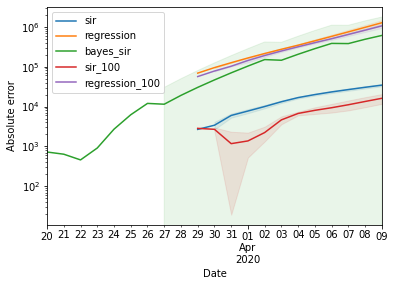

In [203]:
for model in predictions:
    mean_matrix = predictions[model].rolling(len(predictions[model]), min_periods=1).mean()
    mean_matrix[predictions[model].isnull()] = np.nan
    std = mean_matrix.std(axis = 1)
    mean = mean_matrix.mean(axis = 1)
    interval = 1.96 * std / np.sqrt(mean_matrix.notna().sum(axis = 1))
    
    ax = mean.plot(label = model)
    plt.fill_between(mean.index, mean + interval, mean - interval, color = ax.get_lines()[-1].get_color(), alpha=.1)
plt.xlabel("Date")
plt.ylabel("Absolute error")
plt.yscale('log')
plt.legend()
plt.show()